In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


df = pd.read_csv("../datasets/AAPL (2021-2022).csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-17,169.929993,173.470001,169.690002,171.139999,170.152466,195432700
1,2021-12-20,168.279999,170.580002,167.460007,169.750000,168.770493,107499100
2,2021-12-21,171.559998,173.199997,169.119995,172.990005,171.991791,91185900
3,2021-12-22,173.039993,175.860001,172.149994,175.639999,174.626495,92135300
4,2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262817,68356600


# Exploratory data analysis

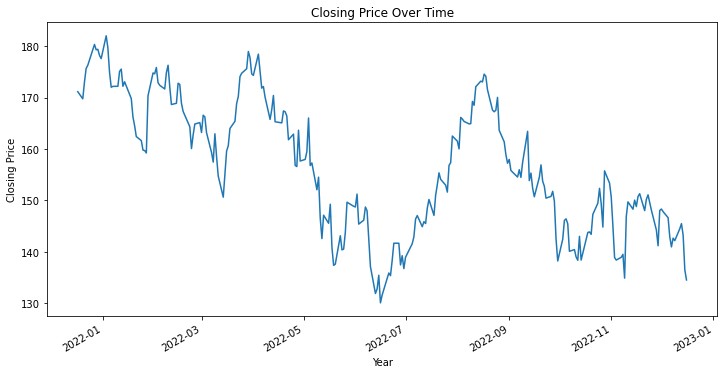

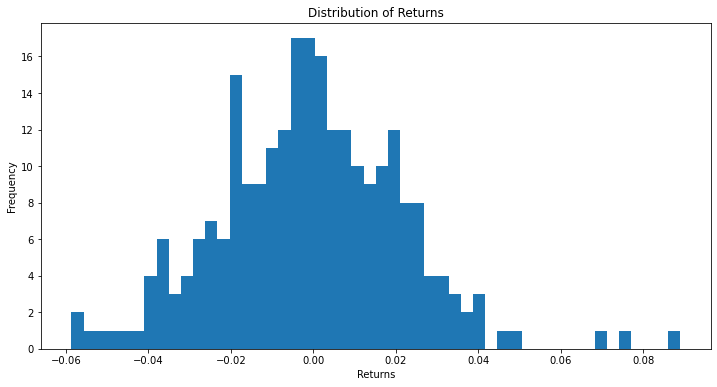

In [3]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Plot the closing price
df['Close'].plot(figsize=(12,6))
plt.title('Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

# Plot a histogram of returns
returns = df['Close'].pct_change()
returns.plot.hist(bins=50, figsize=(12,6))
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# Technical Indicators

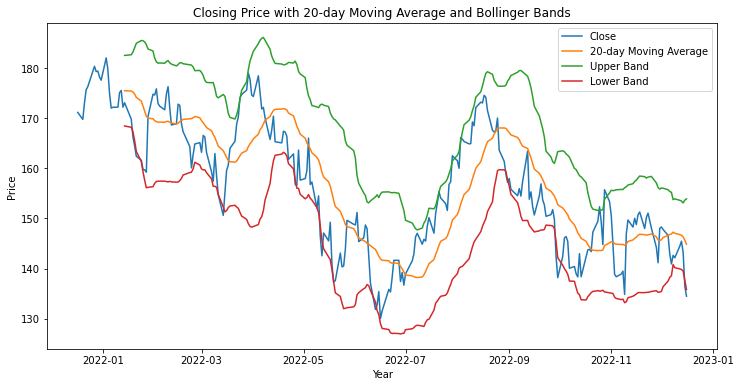

In [4]:
# Calculate the 20-day moving average
df['20d_ma'] = df['Close'].rolling(window=20).mean()

# Calculate the Bollinger Bands
df['20d_std'] = df['Close'].rolling(window=20).std()
df['upper_band'] = df['20d_ma'] + 2 * df['20d_std']
df['lower_band'] = df['20d_ma'] - 2 * df['20d_std']

# Plot the closing price with the moving average and Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['20d_ma'], label='20-day Moving Average')
plt.plot(df['upper_band'], label='Upper Band')
plt.plot(df['lower_band'], label='Lower Band')
plt.title('Closing Price with 20-day Moving Average and Bollinger Bands')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

# Predict

In [ ]:
%pip install tensorflow

In [3]:
# Predictive Modeling: Train machine learning models such as Random Forest and Linear Regression to predict the closing price of a stock
# then compare the performance of the models to determine which one is the best for this problem.

# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the necessary libraries for the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# The Date column is not needed for the model
df = pd.read_csv('../datasets/AAPL (2021-2022).csv', usecols=['Open', 'High', 'Low', 'Close'])

# split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Create the features and target
X_train = train.drop(['Close'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close'], axis=1)
y_test = test['Close']

# Create the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Create the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions using the Linear Regression model
lr_pred = lr.predict(X_test)

# Make predictions using the Random Forest model
rf_pred = rf.predict(X_test)

# Calculate the RMSE for the Linear Regression model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('Linear Regression RMSE: {}'.format(lr_rmse))

# Calculate the RMSE for the Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('Random Forest RMSE: {}'.format(rf_rmse))



Linear Regression RMSE: 1.0613921228483665
Random Forest RMSE: 1.9089608741261106


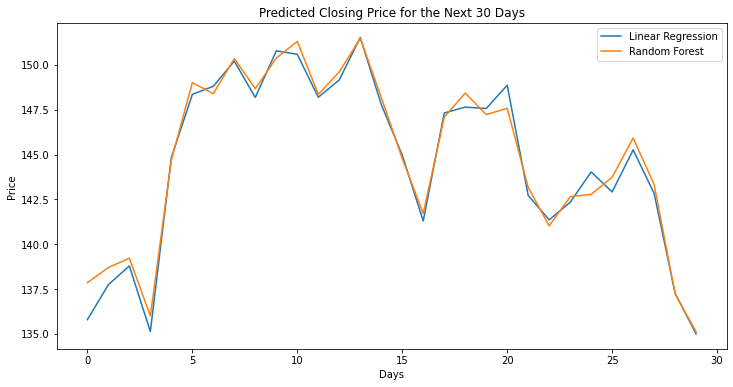

In [1]:
# use models above to plot the predicted closing price in the next 30 days
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the necessary libraries for the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# The Date column is not needed for the model
df = pd.read_csv('../datasets/AAPL (2021-2022).csv', usecols=['Open', 'High', 'Low', 'Close'])

# Create the features and target
X = df.drop(['Close'], axis=1)
y = df['Close']

# Create the Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Create the Random Forest model
rf = RandomForestRegressor()
rf.fit(X, y)

# Create a new dataframe with the last 30 days of data
new_df = df[-30:]

# Create the features and target
X_new = new_df.drop(['Close'], axis=1)
y_new = new_df['Close']

# Make predictions using the Linear Regression model
lr_pred = lr.predict(X_new)

# Make predictions using the Random Forest model
rf_pred = rf.predict(X_new)

# Plot the predicted closing price for the next 30 days
plt.figure(figsize=(12,6))
plt.plot(lr_pred, label='Linear Regression')
plt.plot(rf_pred, label='Random Forest')
plt.title('Predicted Closing Price for the Next 30 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

# Compare multiple datasets

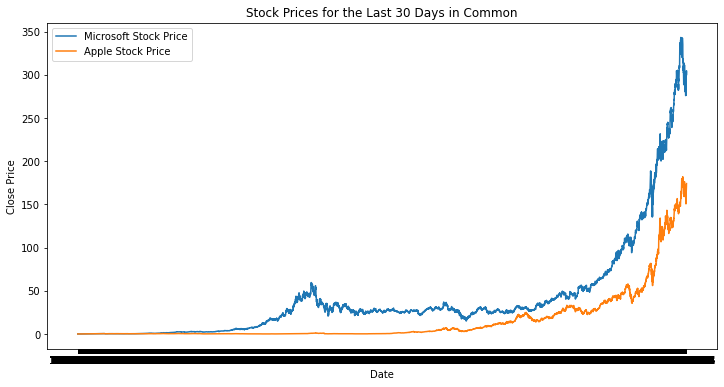

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
# df1 = pd.read_csv('../datasets/Google_Stock_Price_Train.csv')
df1 = pd.read_csv('../datasets/Microsoft_Stock_Price.csv')
df2 = pd.read_csv('../datasets/AAPL.csv')

# Get the common dates between the dataframes
df1_dates = set(df1['Date'])
df2_dates = set(df2['Date'])
common_dates = df1_dates.intersection(df2_dates)

# df1 = df1[df1['Date'].isin(common_dates) & df1['Date'].isin(df2['Date']) & df1['Date'].isin(df3['Date'])].sort_values(by='Date')
# df2 = df2[df2['Date'].isin(common_dates) & df2['Date'].isin(df1['Date']) & df2['Date'].isin(df3['Date'])].sort_values(by='Date')
# df3 = df3[df3['Date'].isin(common_dates) & df3['Date'].isin(df1['Date']) & df3['Date'].isin(df2['Date'])].sort_values(by='Date')

# Filter the data to only keep the common dates
df1 = df1[df1['Date'].isin(common_dates)].sort_values(by='Date')
df2 = df2[df2['Date'].isin(common_dates)].sort_values(by='Date')
# df3 = df3[df3['Date'].isin(common_dates)].sort_values(by='Date')

# Plot the stock prices for the last 30 days in common
plt.figure(figsize=(12,6))

plt.plot(df1['Date'], df1['Close'], label='Microsoft Stock Price')
plt.plot(df2['Date'], df2['Close'], label='Apple Stock Price')
# plt.plot(df3['Date'], df3['Close'], label='')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Stock Prices for the Last 30 Days in Common')
plt.show()

# Correlation analysis between MS and Apple
This will print out the correlation between the close prices of Microsoft and Apple stock. A correlation value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df_msft = pd.read_csv('../datasets/Microsoft_Stock_Price.csv')
df_aapl = pd.read_csv('../datasets/AAPL.csv')

# Extract the close price for both stocks
msft_close = df_msft['Close']
aapl_close = df_aapl['Close']

# Calculate the correlation between the two stocks
correlation = msft_close.corr(aapl_close)
print("The correlation between Microsoft and Apple stock prices is:", correlation)

The correlation between Microsoft and Apple stock prices is: 0.8931245952957988


# Volatility Comparison
This will print out the standard deviation of the daily returns for both Microsoft and Apple stock. The standard deviation is a measure of the volatility of the stock, so a higher standard deviation indicates a more volatile stock.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df_msft = pd.read_csv('../datasets/Microsoft_Stock_Price.csv')
df_aapl = pd.read_csv('../datasets/AAPL.csv')

# Extract the close price for both stocks
msft_close = df_msft['Close']
aapl_close = df_aapl['Close']

# Calculate the daily returns
msft_returns = msft_close.pct_change()
aapl_returns = aapl_close.pct_change()

# Calculate the standard deviation
msft_std = np.std(msft_returns)
aapl_std = np.std(aapl_returns)

print("The standard deviation of Microsoft stock returns is:", msft_std)
print("The standard deviation of Apple stock returns is:", aapl_std)


The standard deviation of Microsoft stock returns is: 0.02132855688953661
The standard deviation of Apple stock returns is: 0.028289027885012235


# Statistical Test
Perform statistical tests with t-test to see if there is a significant difference in the mean close prices of Microsoft and Apple stock.

P-value is the probability of observing a test statistic (difference in means) at least as extreme as the one that was actually observed, assuming that the null hypothesis is true. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

T-statistic is the ratio of the difference in means to the standard error of the difference. A large t-statistic indicates strong evidence against the null hypothesis, so you reject the null hypothesis.


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Read the data
df_msft = pd.read_csv('../datasets/Microsoft_Stock_Price.csv')
df_aapl = pd.read_csv('../datasets/AAPL.csv')

# Extract the close price for both stocks
msft_close = df_msft['Close']
aapl_close = df_aapl['Close']

# Perform a t-test
t_stat, p_value = ttest_ind(msft_close, aapl_close)

print("The t-statistic is:", t_stat)
print("The p-value is:", p_value)

The t-statistic is: 36.345200297583105
The p-value is: 5.351317577309715e-280
